In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [15]:
def read_parquet_by_name(name, src_path='src.csv'):
    src_df = pd.read_csv(src_path)
    result = src_df.loc[src_df['name'] == name, 'links']
    if not result.empty:
        url = result.values[0]
        df = pd.read_parquet(url)
        if 'date' in df.columns:
            df['date'] = pd.to_datetime(df['date'])
        return df
    else:
        raise ValueError(f"No URL found for name: {name}")

wrt = read_parquet_by_name('WRT')

In [16]:
wrt[wrt['series'] == 'growth_yoy'].tail(13)

,series,date,sales,volume,volume_sa
151,growth_yoy,2024-04-01,6.551,4.508,2.162
152,growth_yoy,2024-05-01,7.141,5.723,5.369
153,growth_yoy,2024-06-01,5.438,4.510,1.707
154,growth_yoy,2024-07-01,6.685,5.503,3.156
155,growth_yoy,2024-08-01,4.700,3.779,4.222
156,growth_yoy,2024-09-01,3.827,3.499,4.608
157,growth_yoy,2024-10-01,5.507,5.072,6.153
158,growth_yoy,2024-11-01,4.735,3.900,4.356
159,growth_yoy,2024-12-01,5.720,4.356,5.497
160,growth_yoy,2025-01-01,4.566,3.801,3.746


In [19]:
# Impute new data
# Add new data for 2025-05-01
new_date = pd.to_datetime('2025-05-01')
new_rows = pd.DataFrame([
    {'date': new_date, 'series': 'abs', 'volume': 163.3, 'sales': 163.284, 'volume_sa': 163.097},
    {'date': new_date, 'series': 'growth_yoy', 'volume': 4.134, 'sales': 4.354, 'volume_sa': 2.954},
    {'date': new_date, 'series': 'growth_mom', 'volume': 1.655, 'sales': 1.702, 'volume_sa': 1.649}
])
wrt = pd.concat([wrt, new_rows], ignore_index=True)


In [20]:
# Filter the data
wrt_mom = wrt[wrt['series'] == 'growth_mom'].copy()
wrt_yoy = wrt[wrt['series'] == 'growth_yoy'].copy()
wrt_abs = wrt[wrt['series'] == 'abs'].copy()

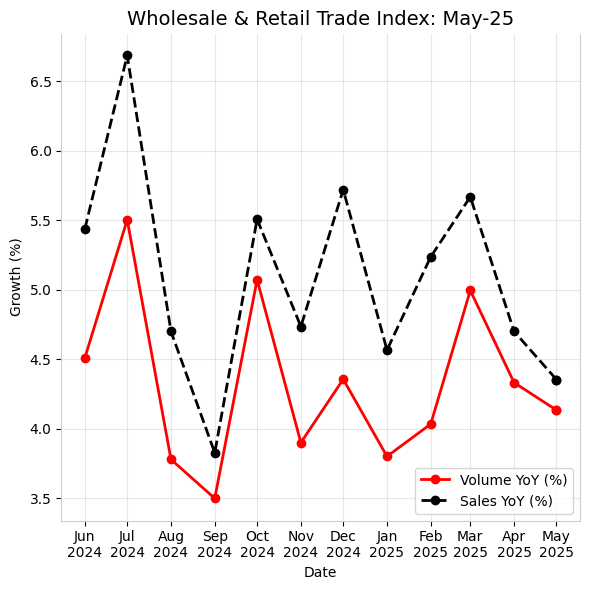

In [29]:
# Filter to the past 12 months
wrt_mom_12 = wrt_mom.sort_values('date').tail(13)
wrt_yoy_12 = wrt_yoy.sort_values('date').tail(13)

fig, ax = plt.subplots(figsize=(6, 6))

# Plot MoM
# ax.plot(
#     wrt_mom_12['date'],
#     wrt_mom_12['volume'],
#     color='black',
#     marker='o',
#     linestyle='--',
#     linewidth=2,
#     label='Volume MoM (%)'
# )

# Plot YoY
ax.plot(
    wrt_yoy_12['date'],
    wrt_yoy_12['volume'],
    color='red',
    marker='o',
    linestyle='-',
    linewidth=2,
    label='Volume YoY (%)'
)

# ax.plot(
#     wrt_mom_12['date'],
#     wrt_mom_12['sales'],
#     color='black',
#     marker='o',
#     linestyle='--',
#     linewidth=2,
#     label='Sales MoM (%)'
# )

ax.plot(
    wrt_yoy_12['date'],
    wrt_yoy_12['sales'],
    color='black',
    marker='o',
    linestyle='--',
    linewidth=2,
    label='Sales YoY (%)'
)

# Set axis labels
ax.set_ylabel('Growth (%)', color='black')
ax.set_xlabel('Date', color='black')

# Set title
ax.set_title('Wholesale & Retail Trade Index: May-25', fontsize=14)

# Set spines color
for spine in ax.spines.values():
    spine.set_edgecolor('#cecece')
ax.spines['top'].set_color('white')

# Set tick params color
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

# Add grid
ax.grid(True, which='major', axis='both', alpha=0.3)

# Add legend
ax.legend(loc='lower right')

# Set x-axis major locator to MonthLocator and formatter to show abbreviated month and year
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))

# Ensure the x-axis ticks and labels are visible and not overlapping
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0, ha='center')
plt.setp(ax.xaxis.get_minorticklabels(), rotation=0, ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()
